In [0]:


# df.apply / df.applymap(f)
# concat

# Normalize / Standardize 

%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? Y


**IMPORTING LIBRARIES**



In [0]:
from google.colab import files
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
import numpy
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

**CREATING A DATASET**



In [0]:
data = {'Name':['Reuben', 'Nrutya', 'Hriday', 'Kedar', 'Malhar', 'KKay'],
        'Age': [21, 15, 21, 21, 21, 23],
        'Shoe-Size': [11, 5, 10, 9, 8, 10]}
data

{'Age': [21, 15, 21, 21, 21, 23],
 'Name': ['Reuben', 'Nrutya', 'Hriday', 'Kedar', 'Malhar', 'KKay'],
 'Shoe-Size': [11, 5, 10, 9, 8, 10]}

In [0]:
dataframe = pd.DataFrame(data)
dataframe.head(10)

,Name,Age,Shoe-Size
0,Reuben,21,11
1,Nrutya,15,5
2,Hriday,21,10
3,Kedar,21,9
4,Malhar,21,8
5,KKay,23,10


**IMPORTING DATASET**



In [0]:
url = "https://raw.githubusercontent.com/reubence/Google-DSC-Workshop-2020/master/datasets/WorkShopDataset2.csv"
df = pd.read_csv(url)

df.head(10) 

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,N,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,N,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


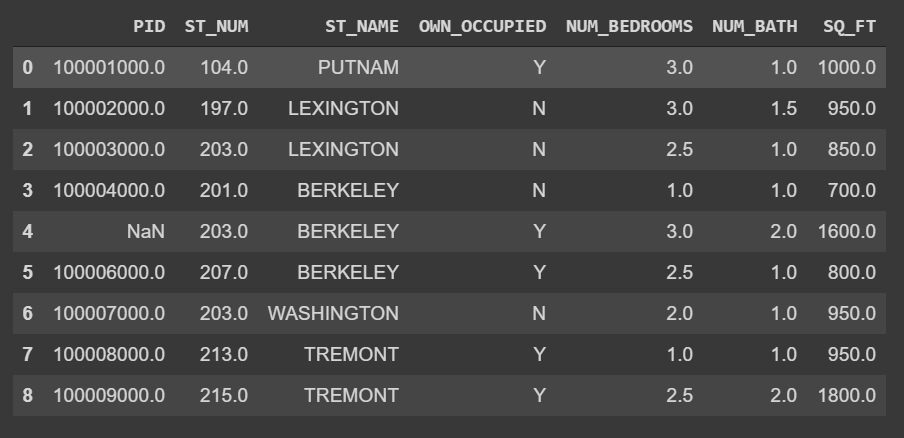

In [0]:
df.tail(6)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
3,100004000.0,201.0,BERKELEY,N,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,N,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [0]:
df.isnull().values.any() #Checking if there are any NULL values

True

In [0]:
df.isnull().mean() * 100 #Sometimes we want to get an overview of how much % of the dataset is actually missing

PID             11.111111
ST_NUM          22.222222
ST_NAME          0.000000
OWN_OCCUPIED     0.000000
NUM_BEDROOMS    22.222222
NUM_BATH        11.111111
SQ_FT           11.111111
dtype: float64

In [0]:
df.isnull().sum() #Here we are checking NULL values column-wise

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    0
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [0]:
df.isnull().sum().sum() #We can also find Total Number of NULL values in the dataset instead of %

7

In [0]:
missing_values = ["n/a", "na", "--", "?", "_"]
df1 = pd.read_csv(url, na_values = missing_values)

In [0]:
df1.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,N,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,N,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [0]:
df1.drop(["PID"], 1 ,inplace = True)
df1.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,Y,3.0,1,1000.0
1,197.0,LEXINGTON,N,3.0,1.5,NaN
2,NaN,LEXINGTON,N,NaN,1,850.0
3,201.0,BERKELEY,N,1.0,NaN,700.0
4,203.0,BERKELEY,Y,3.0,2,1600.0


In [0]:
df1.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,Y,3.0,1,1000.0
1,197.0,LEXINGTON,N,3.0,1.5,NaN
2,NaN,LEXINGTON,N,NaN,1,850.0
3,201.0,BERKELEY,N,1.0,NaN,700.0
4,203.0,BERKELEY,Y,3.0,2,1600.0


In [0]:
dolo = df1.drop(["ST_NUM"], 1 ,inplace = False)
dolo.head()

,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,PUTNAM,Y,3.0,1,1000.0
1,LEXINGTON,N,3.0,1.5,NaN
2,LEXINGTON,N,NaN,1,850.0
3,BERKELEY,N,1.0,NaN,700.0
4,BERKELEY,Y,3.0,2,1600.0


In [0]:
df1.isna()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,True,False,False,True,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,True,False,False,False,False,False
7,False,False,False,False,False,True
8,False,False,False,True,False,False


In [0]:
df1.isnull().sum().sum() #Detecting all values now

8

In [0]:
df1

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,Y,3.0,1,1000.0
1,197.0,LEXINGTON,N,3.0,1.5,NaN
2,NaN,LEXINGTON,N,NaN,1,850.0
3,201.0,BERKELEY,N,1.0,NaN,700.0
4,203.0,BERKELEY,Y,3.0,2,1600.0
5,207.0,BERKELEY,Y,NaN,1,800.0
6,NaN,WASHINGTON,N,2.0,HURLEY,950.0
7,213.0,TREMONT,Y,1.0,1,NaN
8,215.0,TREMONT,Y,NaN,2,1800.0


In [0]:
df1.get_dtype_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64    3
object     3
dtype: int64

In [0]:
df1.select_dtypes(include = ['object']) #here numeric rows are of object types so we need to remember to change them

,ST_NAME,OWN_OCCUPIED,NUM_BATH
0,PUTNAM,Y,1
1,LEXINGTON,N,1.5
2,LEXINGTON,N,1
3,BERKELEY,N,NaN
4,BERKELEY,Y,2
5,BERKELEY,Y,1
6,WASHINGTON,N,HURLEY
7,TREMONT,Y,1
8,TREMONT,Y,2


In [0]:
df1.select_dtypes(include = ['float64']) #here numeric rows are of object types so we need to remember to change them

,ST_NUM,NUM_BEDROOMS,SQ_FT
0,104.0,3.0,1000.0
1,197.0,3.0,NaN
2,NaN,NaN,850.0
3,201.0,1.0,700.0
4,203.0,3.0,1600.0
5,207.0,NaN,800.0
6,NaN,2.0,950.0
7,213.0,1.0,NaN
8,215.0,NaN,1800.0


In [0]:
type(df1["NUM_BATH"][1]) #The value should be int/float. Not String. Need to change.

str

In [0]:
cnt=0
for row in df1['NUM_BATH']:
    try:
        float(row)
        pass
    except ValueError:
        df1.loc[cnt, 'NUM_BATH']=np.nan
    cnt+=1

In [0]:
df1["NUM_BATH"] = pd.to_numeric(df1["NUM_BATH"])

In [0]:
type(df1["NUM_BATH"][1]) #It's float now

numpy.float64

In [0]:
df1.head(10)

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,197.0,LEXINGTON,N,3.0,1.5,NaN
2,NaN,LEXINGTON,N,NaN,1.0,850.0
3,201.0,BERKELEY,N,1.0,NaN,700.0
4,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,207.0,BERKELEY,Y,NaN,1.0,800.0
6,NaN,WASHINGTON,N,2.0,NaN,950.0
7,213.0,TREMONT,Y,1.0,1.0,NaN
8,215.0,TREMONT,Y,NaN,2.0,1800.0


You can replace NA values using either Mean or Median. But it's not always the best idea to replace missing data. It depends on the dataset. Say for example our dataset was a customer feedabck, or some kind of a form which was filled by a person. In such a case it would make sense to fill the NA values using Mean.

For Example: If we replace with Mean on our current dataset we get this output, which doesn't make sense. Houses dont have 2.16777 bedrooms

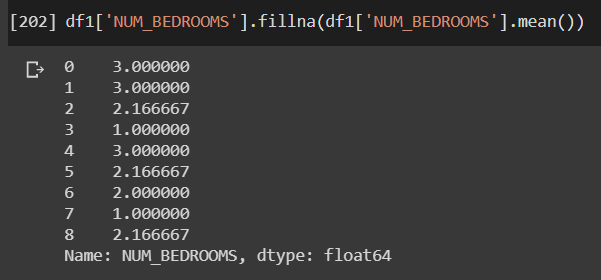

So instead, we can use median to fill in the NA values

In [0]:
df1['NUM_BEDROOMS'] = df1['NUM_BEDROOMS'].fillna(df1['NUM_BEDROOMS'].median())

In [0]:
df1['NUM_BATH'] = df1['NUM_BATH'].fillna(df1['NUM_BATH'].median())

In [0]:
df1['SQ_FT'] = df1['SQ_FT'].fillna(df1['SQ_FT'].median())

In [0]:
df1['ST_NUM'] = df1['ST_NUM'].fillna(df1['ST_NUM'].median())

In [0]:
df1.head(10)

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,197.0,LEXINGTON,N,3.0,1.5,950.0
2,203.0,LEXINGTON,N,2.5,1.0,850.0
3,201.0,BERKELEY,N,1.0,1.0,700.0
4,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,207.0,BERKELEY,Y,2.5,1.0,800.0
6,203.0,WASHINGTON,N,2.0,1.0,950.0
7,213.0,TREMONT,Y,1.0,1.0,950.0
8,215.0,TREMONT,Y,2.5,2.0,1800.0


In [0]:
df1.drop(["PID"], axis = 1, inplace = True)
df1.head(10)

KeyError: ignored

In [0]:
Y = df1["OWN_OCCUPIED"]
Y

0    Y
1    N
2    N
3    N
4    Y
5    Y
6    N
7    Y
8    Y
Name: OWN_OCCUPIED, dtype: object

In [0]:
df1.drop(["OWN_OCCUPIED"], axis = 1,inplace = True)

X = df1
X

,ST_NUM,ST_NAME,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,104.0,PUTNAM,3.0,1.0,1000.0
1,197.0,LEXINGTON,3.0,1.5,950.0
2,203.0,LEXINGTON,2.5,1.0,850.0
3,201.0,BERKELEY,1.0,1.0,700.0
4,203.0,BERKELEY,3.0,2.0,1600.0
5,207.0,BERKELEY,2.5,1.0,800.0
6,203.0,WASHINGTON,2.0,1.0,950.0
7,213.0,TREMONT,1.0,1.0,950.0
8,215.0,TREMONT,2.5,2.0,1800.0


In [0]:
X_Y = pd.concat([X,Y], axis=1) 
X_Y

,ST_NUM,ST_NAME,NUM_BEDROOMS,NUM_BATH,SQ_FT,OWN_OCCUPIED
0,104.0,PUTNAM,3.0,1.0,1000.0,Y
1,197.0,LEXINGTON,3.0,1.5,950.0,N
2,203.0,LEXINGTON,2.5,1.0,850.0,N
3,201.0,BERKELEY,1.0,1.0,700.0,N
4,203.0,BERKELEY,3.0,2.0,1600.0,Y
5,207.0,BERKELEY,2.5,1.0,800.0,Y
6,203.0,WASHINGTON,2.0,1.0,950.0,N
7,213.0,TREMONT,1.0,1.0,950.0,Y
8,215.0,TREMONT,2.5,2.0,1800.0,Y


In [0]:
X.iloc[0:6,0:4]

,ST_NUM,ST_NAME,NUM_BEDROOMS,NUM_BATH
0,104.0,PUTNAM,3.0,1.0
1,197.0,LEXINGTON,3.0,1.5
2,203.0,LEXINGTON,2.5,1.0
3,201.0,BERKELEY,1.0,1.0
4,203.0,BERKELEY,3.0,2.0
5,207.0,BERKELEY,2.5,1.0


In [0]:
df["OWN_OCCUPIED"].value_counts()

Y    5
N    4
Name: OWN_OCCUPIED, dtype: int64

In [0]:
df["OWN_OCCUPIED"].value_counts()["Y"]


5

In [0]:
vars = df1.columns.tolist()
vars

['ST_NUM', 'ST_NAME', 'NUM_BEDROOMS', 'NUM_BATH', 'SQ_FT']

# **MACHINE LEARNING**

In [0]:
url1 = "https://raw.githubusercontent.com/reubence/Google-DSC-Workshop-2020/master/datasets/Automobile_data.csv"
data = pd.read_csv(url1)

In [0]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [0]:
data.isnull().values.any() #Checking if there are any NULL values

False

In [0]:
data["normalized-losses"].value_counts()
#there are ? as missing values

?      41
161    11
91      8
150     7
104     6
134     6
128     6
94      5
74      5
168     5
95      5
65      5
85      5
102     5
103     5
122     4
148     4
106     4
118     4
93      4
115     3
83      3
101     3
154     3
137     3
125     3
153     2
89      2
192     2
108     2
194     2
81      2
129     2
164     2
119     2
158     2
197     2
188     2
145     2
113     2
87      2
110     2
186     1
78      1
77      1
90      1
121     1
142     1
256     1
98      1
107     1
231     1
Name: normalized-losses, dtype: int64

In [0]:
missing_values = ["?"]
data1 = pd.read_csv(url1, na_values = missing_values)
data1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [0]:
data1.isnull().mean() * 100 #Sometimes we want to get an overview of how much % of the dataset is actually missing

symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspiration            0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64

In [0]:
data1.isnull().sum().sum() #We can also find Total Number of NULL values in the dataset instead of %

59

In [0]:
data1.isnull().sum() #Here we are checking NULL values column-wise

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [0]:
data1.get_dtype_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64    11
int64       5
object     10
dtype: int64

In [0]:
categories = data1.select_dtypes(include = ['object']).columns.tolist()
categories
 #here numeric rows are of object types so we need to remember to change them
#Everything looks fine as object variables dont contain any numbers

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [0]:
numeric = data1.select_dtypes(include = ['float64']).columns.tolist() 
numeric
#here numeric rows are of object types so we need to remember to change them

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'price']

In [0]:
data1['normalized-losses'] = data1['normalized-losses'].fillna(data1['normalized-losses'].median())

In [0]:
data1["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [0]:
# data1['num-of-doors'] = data1['num-of-doors'].fillna("four")
data1.dropna(['num-of-doors'], 1 , inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
data1['bore'] = data1['bore'].fillna(data1['bore'].median())

In [0]:
data1['horsepower'] = data1['horsepower'].fillna(data1['horsepower'].median())

In [0]:
data1['stroke'] = data1['stroke'].fillna(data1['stroke'].median())

In [0]:
data1['peak-rpm'] = data1['peak-rpm'].fillna(data1['peak-rpm'].median())

In [0]:
data1['price'] = data1['price'].fillna(data1['price'].median())

In [0]:
data1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,10295.0


In [0]:
data1.isna().sum().sum()
#no more null values :D

2

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

for i in X_train.columns:
    data1.boxplot(column=i)
    plt.show()

NameError: ignored

In [0]:
from scipy import stats

In [0]:
z = np.abs(stats.zscore(X_train)) # z score is the relation between sd and mean

NameError: ignored

In [0]:
new2 = X_train[(z < 1).all(axis=1)]
new2

NameError: ignored

In [0]:
plt.boxplot(new2["width"])

NameError: ignored

In [0]:
Y = data1["fuel-type"]
Y.head()

0    gas
1    gas
2    gas
3    gas
4    gas
Name: fuel-type, dtype: object

In [0]:
X= pd.get_dummies(data = data1, columns = categories)
# X.drop("fuel-type")
X.head()
#One-Hot-Encoding the variables

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
X.isna().sum().sum()

0

# **Support-Vector Machines**

In [0]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=42)

In [0]:
svc = LinearSVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
svc.score(X_test,y_test)

0.8709677419354839

In [0]:
predictions3 = svc.predict(X_test)
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

      diesel       0.00      0.00      0.00         8
         gas       0.87      1.00      0.93        54

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(confusion_matrix(y_test,predictions3))

[[ 0  8]
 [ 0 54]]


# **Logistic Regression**

In [0]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(X_test,y_test)

1.0

In [0]:
predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      diesel       1.00      1.00      1.00         8
         gas       1.00      1.00      1.00        54

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [0]:
print(confusion_matrix(y_test,predictions))

[[ 8  0]
 [ 0 54]]


# **Linear Regression**

In [0]:
X[numeric]

,normalized-losses,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
0,115.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0
1,115.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0
2,115.0,94.5,171.2,65.5,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,3.78,3.15,9.5,114.0,5400.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3.78,3.15,8.7,160.0,5300.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3.58,2.87,8.8,134.0,5500.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3.01,3.40,23.0,106.0,4800.0,22470.0


In [0]:

Yy = X["price"]
Yy

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [0]:
Xx = X[numeric]
Xx.drop(["price"], axis = 1,inplace = True)
Xx

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,normalized-losses,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm
0,115.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0
1,115.0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0
2,115.0,94.5,171.2,65.5,52.4,2.68,3.47,9.0,154.0,5000.0
3,164.0,99.8,176.6,66.2,54.3,3.19,3.40,10.0,102.0,5500.0
4,164.0,99.4,176.6,66.4,54.3,3.19,3.40,8.0,115.0,5500.0
...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,3.78,3.15,9.5,114.0,5400.0
201,95.0,109.1,188.8,68.8,55.5,3.78,3.15,8.7,160.0,5300.0
202,95.0,109.1,188.8,68.9,55.5,3.58,2.87,8.8,134.0,5500.0
203,95.0,109.1,188.8,68.9,55.5,3.01,3.40,23.0,106.0,4800.0


In [0]:
Xx_train, Xx_test, Yy_train, Yy_test = tts(Xx, Yy, test_size=0.3, random_state=42)

In [0]:
reg = LinearRegression()

In [0]:
reg.fit(Xx_train,Yy_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.score(Xx_test,Yy_test)

0.6846131775505817

In [0]:
Yy_test

15     30760.0
9      10295.0
100     9549.0
132    11850.0
68     28248.0
        ...   
56     11845.0
128    37028.0
76      5389.0
144     9233.0
104    17199.0
Name: price, Length: 62, dtype: float64

In [0]:
predictions2 = reg.predict(Xx_test)
predictions2

array([22467.21552787, 20066.72641424, 10724.90073191, 15120.25140184,
       20943.32035431,  6776.19806172,  7337.33710478,  7900.10349666,
       11389.67791032,  8309.84730795, 14388.96865603,  8552.88828342,
       15124.56475379, 12846.76707911, 31260.12267779,  5399.89511995,
        -677.38862118, 16012.1262124 , 10644.27272096, 11456.01107617,
       11358.25540223, 18779.55867203,  6854.3439994 ,  2915.16373999,
        6255.44199704, 24037.6189948 , 14181.0687202 , 15477.35493659,
        7083.13120003, 16011.90470331, 21377.53726198,  6312.95242088,
        5960.46859022, 20337.22012624,  9139.11311561, 20696.87088155,
       13042.10284055, 11485.27716505,  5889.28974722, 15997.2672441 ,
       10602.74040912, 12111.22251435, 17663.12720449,  5922.12830766,
        6443.62243219,  8608.40660977,  6255.44199704,  6326.71697372,
       17397.72878371, 16217.49082258,  5726.34354635, 22431.16307404,
        6499.70457747, 12649.39575744,  7083.13120003, 13973.34777506,
      

In [0]:
Yy_test

15     30760.0
9      10295.0
100     9549.0
132    11850.0
68     28248.0
        ...   
56     11845.0
128    37028.0
76      5389.0
144     9233.0
104    17199.0
Name: price, Length: 62, dtype: float64

As seen below, there is no Linear relationship between variables, hence bad performance

# **KNN**

In [0]:
Y

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [0]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
neigh.score(X_test,y_test)

0.9354838709677419

In [0]:
predicted = neigh.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

      diesel       0.67      1.00      0.80         8
         gas       1.00      0.93      0.96        54

    accuracy                           0.94        62
   macro avg       0.83      0.96      0.88        62
weighted avg       0.96      0.94      0.94        62



In [0]:
print(confusion_matrix(y_test,predicted))

[[ 8  0]
 [ 4 50]]
